<a href="https://colab.research.google.com/github/nikcook152/NFKPools/blob/main/Analytics_and_Big_Data_save_20220619.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Insights

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime
Not connected to a GPU


#1. Setup

##1.1 Library Import 

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

# import warnings filter
from warnings import simplefilter
# ignore warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

##1.2 Data Import
To enable a seamless coloberation, we imported the data from a public G-file, to eleminate user dependent path and file-system dependencies 

In [ ]:
data_ori = pd.read_csv('https://drive.google.com/u/0/uc?id=1KukM45VgI1kLQwtVdGvAuex7DT6TFf12&export=download')
#print(data)

##1.3 General Data exploration
This section is meant to provide us with a general understanding of the data.

In [ ]:
print(data_ori.head(10))

   User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000001  P00069042      F   0-17          10             A   
1  1000001  P00248942      F   0-17          10             A   
2  1000001  P00087842      F   0-17          10             A   
3  1000001  P00085442      F   0-17          10             A   
4  1000002  P00285442      M    55+          16             C   
5  1000003  P00193542      M  26-35          15             A   
6  1000004  P00184942      M  46-50           7             B   
7  1000004  P00346142      M  46-50           7             B   
8  1000004   P0097242      M  46-50           7             B   
9  1000005  P00274942      M  26-35          20             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3           

Next, we will take a look at the data types:

In [ ]:
print(data_ori.dtypes)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


To prevent types in the process of our analysis, we print a list of feature labels:

In [ ]:
print(list(data_ori))

['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


Next, we look at the distribution of our features. This helps us to further understand the features, their ranges and the necessarity for scaling:

In [ ]:
print(data_ori.describe()) 

            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5

Additionally we will look for completness of our dataset (missing values), to see if we have to delete incomplete features or rows:

In [ ]:
print(data_ori.isnull().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


We se that there are no missing values in our dataset, besides for the features Product_category_2 and Product_category_3. 
However those two categories only hold values, if the product belongs to more than one category. 

**Attribute overview and meaning:**
<table> 
<tr>
<th>Feature name</th>
<th>Definition</th>
<th>Feature type</th>
</tr>
<tr>
<td>TBA</td>
<td>TBA</td>
<td>TBA</td>
<tr>
</table>

#2 Feature exploration, Feature engeneering and Data frame preperation

In the following we prepare on emty data frame. 
We use .loc to so or new dataframe inherits the structure from the data_ori dataframe. This is easier, than just creating a new empty frame, because.....

In [ ]:
data = data_ori.loc[:,[]]
print(data.head(10))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


##2.1 User ID 

Exploration: 

----------general feature information----------
count    5.500680e+05
mean     1.003029e+06
std      1.727592e+03
min      1.000001e+06
25%      1.001516e+06
50%      1.003077e+06
75%      1.004478e+06
max      1.006040e+06
Name: User_ID, dtype: float64

----------Value information----------
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


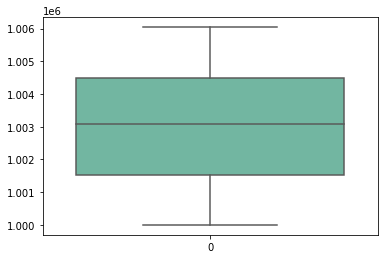

In [ ]:
print("----------general feature information----------")
print(data_ori.User_ID.describe())
print()
print("----------Value information----------")
print(data_ori.User_ID.value_counts())
print(sns.boxplot(data = data_ori.User_ID, orient = "v", palette = "Set2"))

TBA: Explain why nummerical values are bad, but why we are going to keep them at first and delete them at a later stage!

In [ ]:
data['User_ID'] = data_ori['User_ID']
print(data.head(10))

   User_ID
0  1000001
1  1000001
2  1000001
3  1000001
4  1000002
5  1000003
6  1000004
7  1000004
8  1000004
9  1000005


##2.2 Product ID

Exploration:

In [ ]:
print(data_ori.Product_ID.describe())

count        550068
unique         3631
top       P00265242
freq           1880
Name: Product_ID, dtype: object


TBA: Explain why nummerical values are bad and we will not use it; compare to categories... explore (correlation??) Can categories be able to carray the information? 

Trade-off information gain and computing power needed --> also only past products!! Instead of comparing the products, we should compare the features of the products, which in this case are the combination of categories.

##2.3 Gender

TBA

In [ ]:
print("----------general feature information----------")
print(data_ori.Gender.describe())
print()
print("----------Value information----------")
print(data_ori.Gender.value_counts())

----------general feature information----------
count     550068
unique         2
top            M
freq      414259
Name: Gender, dtype: object

----------Value information----------
M    414259
F    135809
Name: Gender, dtype: int64


Add to data frame and explain how:

In [ ]:
data['Male'] = np.where(data_ori['Gender'] == 'M', 1,0)
print(data.head(10))

   User_ID  Male
0  1000001     0
1  1000001     0
2  1000001     0
3  1000001     0
4  1000002     1
5  1000003     1
6  1000004     1
7  1000004     1
8  1000004     1
9  1000005     1


##2.4 Age

TBA

In [ ]:
print("----------general feature information----------")
print(data_ori.Age.describe())
print()
print("----------Value information----------")
print(data_ori.Age.value_counts())

----------general feature information----------
count     550068
unique         7
top        26-35
freq      219587
Name: Age, dtype: object

----------Value information----------
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


In [ ]:
data['Age'] = data_ori['Age'].replace({'0-17':  1, 
                                      '18-25': 2,
                                      '26-35': 3,
                                      '36-45': 4,
                                      '46-50': 5,
                                      '51-55': 6,
                                      '55+': 7})
print(data.head(10))

   User_ID  Male  Age
0  1000001     0    1
1  1000001     0    1
2  1000001     0    1
3  1000001     0    1
4  1000002     1    7
5  1000003     1    3
6  1000004     1    5
7  1000004     1    5
8  1000004     1    5
9  1000005     1    3


##2.5 Occupation

TBA

In [ ]:
print("----------general feature information----------")
print(data_ori.Occupation.describe())
print()
print("----------Value information----------")
print(data_ori.Occupation.value_counts())

----------general feature information----------
count    550068.000000
mean          8.076707
std           6.522660
min           0.000000
25%           2.000000
50%           7.000000
75%          14.000000
max          20.000000
Name: Occupation, dtype: float64

----------Value information----------
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64


TBA

In [ ]:
bi_DF = LabelBinarizer()
bi_dummys = bi_DF.fit_transform(data_ori['Occupation'])
bi_dummys.sum(axis=0) # coun't to validate the number 

array([69638, 47426, 26588, 17650, 72308, 12177, 20355, 59133,  1546,
        6291, 12930, 11586, 31179,  7728, 27309, 12165, 25371, 40043,
        6622,  8461, 33562])

TBA

In [ ]:
DF_dummys = pd.DataFrame(bi_dummys, columns=['Occupation_0', 'Occupation_1', 'Occupation_2', 'Occupation_3','Occupation_4','Occupation_5','Occupation_6','Occupation_7','Occupation_8','Occupation_9','Occupation_10','Occupation_11','Occupation_12','Occupation_13','Occupation_14','Occupation_15','Occupation_16','Occupation_17','Occupation_18','Occupation_19','Occupation_20',]) #transform into data frame; name columns 
DF_dummys.head(10)

,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


TBA

In [ ]:
# drop the first column to avoid the dummy variable trap
DF_dummys = DF_dummys.drop('Occupation_0', axis = 1)
DF_dummys.head(10)

,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


TBA

In [ ]:
#concat to the end of the data frame; to keep the sequence of the data frame 
data = pd.concat([data, DF_dummys], axis=1)
data.head(10)

,User_ID,Male,Age,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,1000001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000002,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1000003,1,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1000004,1,5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1000004,1,5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1000004,1,5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1000005,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##2.6 City Category

TBA

In [ ]:
print("----------general feature information----------")
print(data_ori.City_Category.describe())
print()
print("----------Value information----------")
print(data_ori.City_Category.value_counts())

----------general feature information----------
count     550068
unique         3
top            B
freq      231173
Name: City_Category, dtype: object

----------Value information----------
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


TBA

In [ ]:
bi_DF = LabelBinarizer()
bi_dummys = bi_DF.fit_transform(data_ori['City_Category'])
bi_dummys.sum(axis=0) # coun't to validate the number 

array([147720, 231173, 171175])

TBA

In [ ]:
DF_dummys = pd.DataFrame(bi_dummys, columns=['City_Category_1','City_Category_2','City_Category_3']) #transform into data frame; name columns 
DF_dummys.head(10)

,City_Category_1,City_Category_2,City_Category_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
5,1,0,0
6,0,1,0
7,0,1,0
8,0,1,0
9,1,0,0


TBA

In [ ]:
# drop the first column to avoid the dummy variable trap
DF_dummys = DF_dummys.drop('City_Category_1', axis = 1)
DF_dummys.head(10)

,City_Category_2,City_Category_3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
5,0,0
6,1,0
7,1,0
8,1,0
9,0,0


TBA

In [ ]:
#concat to the end of the data frame; to keep the sequence of the data frame 
data = pd.concat([data, DF_dummys], axis=1)
data.head(10)

,User_ID,Male,Age,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,...,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_2,City_Category_3
0,1000001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000002,1,7,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,1000003,1,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1000004,1,5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,1000004,1,5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,1000004,1,5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9,1000005,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


##2.7 Stay In Current City Years

TBA

In [ ]:
print("----------general feature information----------")
print(data_ori.Stay_In_Current_City_Years.describe())
print()
print("----------Value information----------")
print(data_ori.Stay_In_Current_City_Years.value_counts())

----------general feature information----------
count     550068
unique         5
top            1
freq      193821
Name: Stay_In_Current_City_Years, dtype: object

----------Value information----------
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


TBA

In [ ]:
data_ori['Stay_In_Current_City_Years'] = data_ori['Stay_In_Current_City_Years'].replace({'4+': 4})
data['Stay_In_Current_City_Years'] = pd.to_numeric(data_ori['Stay_In_Current_City_Years'])      #turn strings into integer
data.head(10)

,User_ID,Male,Age,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,...,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_2,City_Category_3,Stay_In_Current_City_Years
0,1000001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,1000001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,1000001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1000001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,1000002,1,7,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,4
5,1000003,1,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3
6,1000004,1,5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2
7,1000004,1,5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2
8,1000004,1,5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2
9,1000005,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


##2.8 Maritial Status

TBA

In [ ]:
print("----------general feature information----------")
print(data_ori.Marital_Status.describe())
print()
print("----------Value information----------")
print(data_ori.Marital_Status.value_counts())

----------general feature information----------
count    550068.000000
mean          0.409653
std           0.491770
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Marital_Status, dtype: float64

----------Value information----------
0    324731
1    225337
Name: Marital_Status, dtype: int64


This Feature is already correctly formatted, changing just the naming to make it more clear

In [ ]:
data_ori = data_ori.rename(columns={'Marital_Status': 'Married'})
data = pd.concat([data, data_ori['Married']], axis=1)
data.head(10)

,User_ID,Male,Age,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,...,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_2,City_Category_3,Stay_In_Current_City_Years,Married
0,1000001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,1000001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2,1000001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
3,1000001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
4,1000002,1,7,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,4,0
5,1000003,1,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,3,0
6,1000004,1,5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,2,1
7,1000004,1,5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,2,1
8,1000004,1,5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,2,1
9,1000005,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


##2.9 Product Category (1 to 3)

TBA

In [ ]:
print("----------general feature information----------")
print(data_ori.Product_Category_1.describe())
print()
print("----------Value information----------")
print(data_ori.Product_Category_1.value_counts())

----------general feature information----------
count    550068.000000
mean          5.404270
std           3.936211
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64

----------Value information----------
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64


In [ ]:
data_ori.Product_Category_2.fillna(value = 0, inplace = True)
print("----------general feature information----------")
print(data_ori.Product_Category_2.describe())
print()
print("----------Value information----------")
print(data_ori.Product_Category_2.value_counts())

----------general feature information----------
count    550068.000000
mean          6.735436
std           6.215492
min           0.000000
25%           0.000000
50%           5.000000
75%          14.000000
max          18.000000
Name: Product_Category_2, dtype: float64

----------Value information----------
0.0     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64


In [ ]:
data_ori.Product_Category_3.fillna(value = 0, inplace = True)
print("----------general feature information----------")
print(data_ori.Product_Category_3.describe())
print()
print("----------Value information----------")
print(data_ori.Product_Category_3.value_counts())

----------general feature information----------
count    550068.000000
mean          3.841941
std           6.250712
min           0.000000
25%           0.000000
50%           0.000000
75%           8.000000
max          18.000000
Name: Product_Category_3, dtype: float64

----------Value information----------
0.0     383247
16.0     32636
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: Product_Category_3, dtype: int64


We come to the conlcusion that all three features consist of the same values...

### 2.9.1 One hot encoding 

First we need to one hot encode the three categories 

In [ ]:
bi_DF = LabelBinarizer()

In [ ]:
bi_dummys_1 = bi_DF.fit_transform(data_ori['Product_Category_1'])
bi_dummys_1.sum(axis=0) # coun't to validate the number 

array([140378,  23864,  20213,  11753, 150933,  20466,   3721, 113925,
          410,   5125,  24287,   3947,   5549,   1523,   6290,   9828,
          578,   3125,   1603,   2550])

In [ ]:
bi_dummys_2 = bi_DF.fit_transform(data_ori['Product_Category_2'])
bi_dummys_2.sum(axis=0) # coun't to validate the number 

array([173638,  49217,   2884,  25677,  26235,  16466,    626,  64088,
         5693,   3043,  14134,   5528,  10531,  55108,  37855,  43255,
        13320,   2770])

In [ ]:
bi_dummys_3 = bi_DF.fit_transform(data_ori['Product_Category_3'])
bi_dummys_3.sum(axis=0) # coun't to validate the number 

array([383247,    613,   1875,  16658,   4890,  12562,  11579,   1726,
         1805,   9246,   5459,  18428,  28013,  32636,  16702,   4629])

After validating the value count, we ...

In [ ]:
DF_dummys_1 = pd.DataFrame(bi_dummys_1, columns=['Product_Cat_1','Product_Cat_2','Product_Cat_3','Product_Cat_4','Product_Cat_5','Product_Cat_6','Product_Cat_7','Product_Cat_8','Product_Cat_9','Product_Cat_10','Product_Cat_11','Product_Cat_12','Product_Cat_13','Product_Cat_14','Product_Cat_15','Product_Cat_16','Product_Cat_17','Product_Cat_18','Product_Cat_19','Product_Cat_20']) #transform into data frame; name columns 
DF_dummys_1.head(10)

,Product_Cat_1,Product_Cat_2,Product_Cat_3,Product_Cat_4,Product_Cat_5,Product_Cat_6,Product_Cat_7,Product_Cat_8,Product_Cat_9,Product_Cat_10,Product_Cat_11,Product_Cat_12,Product_Cat_13,Product_Cat_14,Product_Cat_15,Product_Cat_16,Product_Cat_17,Product_Cat_18,Product_Cat_19,Product_Cat_20
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
DF_dummys_2 = pd.DataFrame(bi_dummys_2, columns=['Product_Cat_0','Product_Cat_2','Product_Cat_3','Product_Cat_4','Product_Cat_5','Product_Cat_6','Product_Cat_7','Product_Cat_8','Product_Cat_9','Product_Cat_10','Product_Cat_11','Product_Cat_12','Product_Cat_13','Product_Cat_14','Product_Cat_15','Product_Cat_16','Product_Cat_17','Product_Cat_18']) #transform into data frame; name columns 
DF_dummys_2.head(10)

,Product_Cat_0,Product_Cat_2,Product_Cat_3,Product_Cat_4,Product_Cat_5,Product_Cat_6,Product_Cat_7,Product_Cat_8,Product_Cat_9,Product_Cat_10,Product_Cat_11,Product_Cat_12,Product_Cat_13,Product_Cat_14,Product_Cat_15,Product_Cat_16,Product_Cat_17,Product_Cat_18
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
DF_dummys_3 = pd.DataFrame(bi_dummys_3, columns=['Product_Cat_0','Product_Cat_3','Product_Cat_4','Product_Cat_5','Product_Cat_6','Product_Cat_8','Product_Cat_9','Product_Cat_10','Product_Cat_11','Product_Cat_12','Product_Cat_13','Product_Cat_14','Product_Cat_15','Product_Cat_16','Product_Cat_17','Product_Cat_18']) #transform into data frame; name columns 
DF_dummys_3.head(10)

,Product_Cat_0,Product_Cat_3,Product_Cat_4,Product_Cat_5,Product_Cat_6,Product_Cat_8,Product_Cat_9,Product_Cat_10,Product_Cat_11,Product_Cat_12,Product_Cat_13,Product_Cat_14,Product_Cat_15,Product_Cat_16,Product_Cat_17,Product_Cat_18
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_add = DF_dummys_1.add(DF_dummys_2.add(DF_dummys_3, fill_value = 0), fill_value = 0)
df_add.head(10)

,Product_Cat_0,Product_Cat_1,Product_Cat_10,Product_Cat_11,Product_Cat_12,Product_Cat_13,Product_Cat_14,Product_Cat_15,Product_Cat_16,Product_Cat_17,...,Product_Cat_19,Product_Cat_2,Product_Cat_20,Product_Cat_3,Product_Cat_4,Product_Cat_5,Product_Cat_6,Product_Cat_7,Product_Cat_8,Product_Cat_9
0,2.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1,0,0,0,0.0,0,0
1,0.0,1.0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0,0,0,1,0.0,0,0
2,2.0,0.0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,0
3,1.0,0.0,0,0,1,0,1,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,0
4,2.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0.0,1,0
5,1.0,1.0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0,0,0,0,0.0,0,0
6,0.0,1.0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0,0,0,0,0.0,1,0
7,1.0,1.0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,0
8,1.0,1.0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,0
9,2.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0.0,1,0


In [ ]:
df_add = pd.concat([data['User_ID'], df_add], axis=1)
df_add.head(10)

,User_ID,Product_Cat_0,Product_Cat_1,Product_Cat_10,Product_Cat_11,Product_Cat_12,Product_Cat_13,Product_Cat_14,Product_Cat_15,Product_Cat_16,...,Product_Cat_19,Product_Cat_2,Product_Cat_20,Product_Cat_3,Product_Cat_4,Product_Cat_5,Product_Cat_6,Product_Cat_7,Product_Cat_8,Product_Cat_9
0,1000001,2.0,0.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1,0,0,0,0.0,0,0
1,1000001,0.0,1.0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0,0,0,1,0.0,0,0
2,1000001,2.0,0.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,0
3,1000001,1.0,0.0,0,0,1,0,1,0,0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,0
4,1000002,2.0,0.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0.0,1,0
5,1000003,1.0,1.0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0,0,0,0,0.0,0,0
6,1000004,0.0,1.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0.0,1,0
7,1000004,1.0,1.0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,0
8,1000004,1.0,1.0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0,0,0,0,0.0,0,0
9,1000005,2.0,0.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0.0,1,0


In [ ]:
df_add = df_add.groupby('User_ID').sum()
df_add = df_add.drop('Product_Cat_0', axis = 1)
df_add.head(10)

,Product_Cat_1,Product_Cat_10,Product_Cat_11,Product_Cat_12,Product_Cat_13,Product_Cat_14,Product_Cat_15,Product_Cat_16,Product_Cat_17,Product_Cat_18,Product_Cat_19,Product_Cat_2,Product_Cat_20,Product_Cat_3,Product_Cat_4,Product_Cat_5,Product_Cat_6,Product_Cat_7,Product_Cat_8,Product_Cat_9
User_ID,,,,,,,,,,,,,,,,,,,,
1000001,4.0,0,0,8,0,3,1,2,2,0,0.0,3.0,1.0,11,13,5,2,0.0,13,2
1000002,31.0,1,2,0,3,10,7,14,7,1,0.0,9.0,1.0,0,0,15,9,0.0,46,1
1000003,15.0,0,2,0,0,3,1,2,0,4,0.0,15.0,0.0,1,1,15,0,0.0,6,0
1000004,13.0,0,2,0,0,2,5,3,1,0,0.0,4.0,1.0,0,0,0,1,0.0,2,1
1000005,18.0,1,5,2,4,13,6,21,2,0,0.0,5.0,0.0,2,4,26,9,5.0,57,0
1000006,8.0,0,0,10,0,20,0,2,2,4,0.0,5.0,1.0,6,12,21,1,0.0,14,1
1000007,14.0,0,1,0,0,2,7,7,1,0,0.0,3.0,1.0,0,0,1,1,0.0,3,0
1000008,22.0,0,1,1,2,19,9,14,4,0,1.0,6.0,0.0,2,0,9,6,0.0,55,0
1000009,11.0,1,0,0,1,7,3,18,4,0,0.0,2.0,1.0,5,4,13,13,1.0,29,1


Add to dataframe 

In [ ]:
data = data.groupby('User_ID').first()
data.head(10)


,Male,Age,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,...,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_2,City_Category_3,Stay_In_Current_City_Years,Married
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1000002,1,7,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,4,0
1000003,1,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,3,0
1000004,1,5,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,2,1
1000005,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1000006,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1000007,1,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1000008,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,1
1000009,1,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
data.describe()

,Male,Age,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,...,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_2,City_Category_3,Stay_In_Current_City_Years,Married
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,...,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,0.717196,3.620438,0.087761,0.043456,0.028858,0.125615,0.018842,0.038703,0.113563,0.002886,...,0.023765,0.039891,0.083347,0.011373,0.012052,0.046342,0.289764,0.532847,1.858598,0.419963
std,0.450400,1.499592,0.282971,0.203899,0.167420,0.331443,0.135979,0.192903,0.317307,0.053646,...,0.152329,0.195721,0.276430,0.106046,0.109129,0.210242,0.453691,0.498962,1.281394,0.493594
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
75%,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
df_add.describe()

,Product_Cat_1,Product_Cat_10,Product_Cat_11,Product_Cat_12,Product_Cat_13,Product_Cat_14,Product_Cat_15,Product_Cat_16,Product_Cat_17,Product_Cat_18,Product_Cat_19,Product_Cat_2,Product_Cat_20,Product_Cat_3,Product_Cat_4,Product_Cat_5,Product_Cat_6,Product_Cat_7,Product_Cat_8,Product_Cat_9
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,23.829231,1.679511,6.828382,3.177898,3.656255,12.741300,12.248854,14.550840,5.194364,1.786454,0.272110,12.405534,0.432864,4.024784,6.672042,32.902054,7.099304,0.737905,32.350195,3.001528
std,29.882021,2.634334,13.037868,5.284239,5.063584,16.517119,16.354618,18.635178,6.483837,3.234874,0.445084,15.481344,0.495514,6.411767,11.038906,41.388200,9.054756,1.884497,40.233387,4.201766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,7.000000,1.000000,0.000000,8.000000,0.000000
50%,11.000000,1.000000,2.000000,1.000000,2.000000,6.000000,5.000000,8.000000,3.000000,1.000000,0.000000,6.000000,0.000000,2.000000,3.000000,17.000000,4.000000,0.000000,17.000000,1.000000
75%,31.000000,2.000000,7.000000,4.000000,5.000000,17.000000,16.000000,18.000000,7.000000,2.000000,1.000000,17.000000,1.000000,5.000000,8.000000,41.000000,9.000000,1.000000,40.000000,4.000000
max,209.000000,22.000000,161.000000,52.000000,58.000000,209.000000,123.000000,182.000000,63.000000,32.000000,1.000000,115.000000,1.000000,53.000000,110.000000,340.000000,78.000000,24.000000,394.000000,28.000000


In [ ]:
data = pd.concat([data, df_add], axis=1)
data.head(10)

,Male,Age,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,...,Product_Cat_19,Product_Cat_2,Product_Cat_20,Product_Cat_3,Product_Cat_4,Product_Cat_5,Product_Cat_6,Product_Cat_7,Product_Cat_8,Product_Cat_9
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,0,1,0,0,0,0,0,0,0,0,...,0.0,3.0,1.0,11,13,5,2,0.0,13,2
1000002,1,7,0,0,0,0,0,0,0,0,...,0.0,9.0,1.0,0,0,15,9,0.0,46,1
1000003,1,3,0,0,0,0,0,0,0,0,...,0.0,15.0,0.0,1,1,15,0,0.0,6,0
1000004,1,5,0,0,0,0,0,0,1,0,...,0.0,4.0,1.0,0,0,0,1,0.0,2,1
1000005,1,3,0,0,0,0,0,0,0,0,...,0.0,5.0,0.0,2,4,26,9,5.0,57,0
1000006,0,6,0,0,0,0,0,0,0,0,...,0.0,5.0,1.0,6,12,21,1,0.0,14,1
1000007,1,4,1,0,0,0,0,0,0,0,...,0.0,3.0,1.0,0,0,1,1,0.0,3,0
1000008,1,3,0,0,0,0,0,0,0,0,...,1.0,6.0,0.0,2,0,9,6,0.0,55,0
1000009,1,3,0,0,0,0,0,0,0,0,...,0.0,2.0,1.0,5,4,13,13,1.0,29,1


##2.10 Purchase (Target Variable)

Add target variable to the data

In [ ]:
data = pd.concat([data, data_ori.groupby('User_ID').sum().Purchase], axis=1)
data.head(10)

,Male,Age,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,...,Product_Cat_2,Product_Cat_20,Product_Cat_3,Product_Cat_4,Product_Cat_5,Product_Cat_6,Product_Cat_7,Product_Cat_8,Product_Cat_9,Purchase
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,0,1,0,0,0,0,0,0,0,0,...,3.0,1.0,11,13,5,2,0.0,13,2,334093
1000002,1,7,0,0,0,0,0,0,0,0,...,9.0,1.0,0,0,15,9,0.0,46,1,810472
1000003,1,3,0,0,0,0,0,0,0,0,...,15.0,0.0,1,1,15,0,0.0,6,0,341635
1000004,1,5,0,0,0,0,0,0,1,0,...,4.0,1.0,0,0,0,1,0.0,2,1,206468
1000005,1,3,0,0,0,0,0,0,0,0,...,5.0,0.0,2,4,26,9,5.0,57,0,821001
1000006,0,6,0,0,0,0,0,0,0,0,...,5.0,1.0,6,12,21,1,0.0,14,1,379930
1000007,1,4,1,0,0,0,0,0,0,0,...,3.0,1.0,0,0,1,1,0.0,3,0,234668
1000008,1,3,0,0,0,0,0,0,0,0,...,6.0,0.0,2,0,9,6,0.0,55,0,796593
1000009,1,3,0,0,0,0,0,0,0,0,...,2.0,1.0,5,4,13,13,1.0,29,1,594099


#3 Split the dataframes

TBA

In [ ]:
data_x = data.drop('Purchase', axis = 1)
data_x.head(10)

,Male,Age,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,...,Product_Cat_19,Product_Cat_2,Product_Cat_20,Product_Cat_3,Product_Cat_4,Product_Cat_5,Product_Cat_6,Product_Cat_7,Product_Cat_8,Product_Cat_9
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,0,1,0,0,0,0,0,0,0,0,...,0.0,3.0,1.0,11,13,5,2,0.0,13,2
1000002,1,7,0,0,0,0,0,0,0,0,...,0.0,9.0,1.0,0,0,15,9,0.0,46,1
1000003,1,3,0,0,0,0,0,0,0,0,...,0.0,15.0,0.0,1,1,15,0,0.0,6,0
1000004,1,5,0,0,0,0,0,0,1,0,...,0.0,4.0,1.0,0,0,0,1,0.0,2,1
1000005,1,3,0,0,0,0,0,0,0,0,...,0.0,5.0,0.0,2,4,26,9,5.0,57,0
1000006,0,6,0,0,0,0,0,0,0,0,...,0.0,5.0,1.0,6,12,21,1,0.0,14,1
1000007,1,4,1,0,0,0,0,0,0,0,...,0.0,3.0,1.0,0,0,1,1,0.0,3,0
1000008,1,3,0,0,0,0,0,0,0,0,...,1.0,6.0,0.0,2,0,9,6,0.0,55,0
1000009,1,3,0,0,0,0,0,0,0,0,...,0.0,2.0,1.0,5,4,13,13,1.0,29,1


In [ ]:
data_y = data['Purchase']
data_y.head(10)

User_ID
1000001     334093
1000002     810472
1000003     341635
1000004     206468
1000005     821001
1000006     379930
1000007     234668
1000008     796593
1000009     594099
1000010    2169510
Name: Purchase, dtype: int64

#4 Scaling (normilazation)

In [ ]:
from sklearn import preprocessing
nscaler = preprocessing.MinMaxScaler()
data_x.iloc[:,:] = nscaler.fit_transform(data_x.iloc[:,:])

data_x.describe()

,Male,Age,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,...,Product_Cat_19,Product_Cat_2,Product_Cat_20,Product_Cat_3,Product_Cat_4,Product_Cat_5,Product_Cat_6,Product_Cat_7,Product_Cat_8,Product_Cat_9
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,...,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,0.717196,0.436740,0.087761,0.043456,0.028858,0.125615,0.018842,0.038703,0.113563,0.002886,...,0.272110,0.107874,0.432864,0.075939,0.060655,0.096771,0.091017,0.030746,0.082107,0.107197
std,0.450400,0.249932,0.282971,0.203899,0.167420,0.331443,0.135979,0.192903,0.317307,0.053646,...,0.445084,0.134620,0.495514,0.120977,0.100354,0.121730,0.116087,0.078521,0.102115,0.150063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.017391,0.000000,0.000000,0.009091,0.020588,0.012821,0.000000,0.020305,0.000000
50%,1.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.052174,0.000000,0.037736,0.027273,0.050000,0.051282,0.000000,0.043147,0.035714
75%,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.147826,1.000000,0.094340,0.072727,0.120588,0.115385,0.041667,0.101523,0.142857
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#5 Partitioning 

In [ ]:
from sklearn.model_selection import train_test_split

training_set_percentage = 0.64 #@param {type:"slider", min:0, max:1, step:0.01}
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size = 1 - training_set_percentage, random_state=0)
print(Y_train.value_counts())
print(Y_test.value_counts())
print("---Train Shape---")
print(Y_train.shape)
print("---Test Shape---")
print(Y_test.shape)
print(len(Y_test))

Y_train_mean = Y_test.mean()
print("Y_train_mean =", y_train_mean)
Y_train_meandev = sum((Y_train-y_train_mean)**2)
print("Y_train_meandev =", Y_train_meandev)
Y_test_meandev = sum((Y_test-y_train_mean)**2)
print("Y_test_meandev =", Y_test_meandev)

329348     2
985855     2
116586     2
234934     2
278252     1
          ..
108873     1
1131248    1
471881     1
2283239    1
666965     1
Name: Purchase, Length: 3766, dtype: int64
270475     2
365501     2
325558     2
784192     2
2335655    1
          ..
866552     1
152942     1
130376     1
359850     1
112200     1
Name: Purchase, Length: 2117, dtype: int64
---Train Shape---
(3770,)
---Test Shape---
(2121,)
2121
Y_train_mean = 881279.1275720164
Y_train_meandev = 3334860124521200.0
Y_test_meandev = 1911536820408555.2


In [ ]:
# create report dataframe
report = pd.DataFrame(columns=['Model','R2.Train','R2.Test','R2_Mean_CV','R2_Std_CV'])

#6 Models (pre tesing)

##6.1 OLS

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_train_pred = lm.predict(X_train)
Y_train_dev = sum((Y_train-Y_train_pred)**2)
r2 = 1 - Y_train_dev/Y_train_meandev
print("R2 =", r2)
Y_test_pred = lm.predict(X_test)
Y_test_dev = sum((Y_test-Y_test_pred)**2)
pseudor2 = 1 - Y_test_dev/Y_test_meandev
print("Pseudo-R2 =", pseudor2)
report.loc[len(report)] = ['OLS RegressionCV', r2, pseudor2, "", ""]

# OLS with Cross Validation and Grid Search
from sklearn.linear_model import LinearRegression
lmCV = LinearRegression()
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'fit_intercept':[True,False]
}
CV_olsmodel = GridSearchCV(estimator=lmCV, param_grid=param_grid, cv=10)
CV_olsmodel.fit(X_train, Y_train)
print(CV_olsmodel.best_params_)
lmCV = lmCV.set_params(**CV_olsmodel.best_params_)
lmCV.fit(X_train, Y_train)
Y_train_pred = lmCV.predict(X_train)
Y_train_dev = sum((Y_train-Y_train_pred)**2)
r2 = 1 - Y_train_dev/Y_train_meandev
print("R2 =", r2)
Y_test_pred = lmCV.predict(X_test)
Y_test_dev = sum((Y_test-Y_test_pred)**2)
pseudor2 = 1 - Y_test_dev/Y_test_meandev
print("Pseudo-R2 =", pseudor2)
report.loc[len(report)] = ['OLS RegressionCV', r2, pseudor2,
           CV_olsmodel.cv_results_['mean_test_score'][CV_olsmodel.best_index_],
           CV_olsmodel.cv_results_['std_test_score'][CV_olsmodel.best_index_]]

R2 = 0.9764689586672186
Pseudo-R2 = 0.9714599912714267
{'fit_intercept': False}
R2 = 0.9764646457786608
Pseudo-R2 = 0.9714536130783074


##6.2 Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.5)
ridgereg.fit(X_train, Y_train)
Y_train_pred = ridgereg.predict(X_train)
Y_train_dev = sum((Y_train-Y_train_pred)**2)
r2 = 1 - Y_train_dev/Y_train_meandev
print("R2 =", r2)
Y_test_pred = ridgereg.predict(X_test)
Y_test_dev = sum((Y_test-Y_test_pred)**2)
pseudor2 = 1 - Y_test_dev/Y_test_meandev
print("Pseudo-R2 =", pseudor2)

# find best lambda (alphas)
from sklearn.linear_model import Ridge
ridgeregCV = Ridge()
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'alpha': [25,10,4,3,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01,0]
}
CV_rrmodel = GridSearchCV(estimator=ridgeregCV, param_grid=param_grid, cv=10)
CV_rrmodel.fit(X_train, Y_train)
print(CV_rrmodel.best_params_)
ridgeregCV = ridgeregCV.set_params(**CV_rrmodel.best_params_)
ridgeregCV.fit(X_train, Y_train)
Y_train_pred = ridgeregCV.predict(X_train)
Y_train_dev = sum((Y_train-Y_train_pred)**2)
r2 = 1 - Y_train_dev/Y_train_meandev
print("R2 =", r2)
Y_test_pred = ridgeregCV.predict(X_test)
Y_test_dev = sum((Y_test-Y_test_pred)**2)
pseudor2 = 1 - Y_test_dev/Y_test_meandev
print("Pseudo-R2 =", pseudor2)
report.loc[len(report)] = ['Ridge RegressionCV', r2, pseudor2,
           CV_rrmodel.cv_results_['mean_test_score'][CV_rrmodel.best_index_],
           CV_rrmodel.cv_results_['std_test_score'][CV_rrmodel.best_index_]]

R2 = 0.976396007114426
Pseudo-R2 = 0.9714357579309817
{'alpha': 0.2}
R2 = 0.9764549454610053
Pseudo-R2 = 0.9714667659734717


##6.3 Support Vector Regression

In [ ]:
# linear kernel
print("linear kernel")
from sklearn.svm import SVR
LinSVRreg = SVR(kernel='linear', C=1.0, epsilon=0.1)
LinSVRreg.fit(X_train, Y_train)
Y_train_pred = LinSVRreg.predict(X_train)
Y_train_dev = sum((Y_train-Y_train_pred)**2)
r2 = 1 - Y_train_dev/Y_train_meandev
print("R2 =", r2)
Y_test_pred = LinSVRreg.predict(X_test)
Y_test_dev = sum((Y_test-Y_test_pred)**2)
pseudor2 = 1 - Y_test_dev/Y_test_meandev
print("Pseudo-R2 =", pseudor2)

# radial kernel
print("radial kernel")
RbfSVRreg = SVR(kernel='rbf', C=1.0, epsilon=0.1)
RbfSVRreg.fit(X_train, Y_train)
Y_train_pred = RbfSVRreg.predict(X_train)
Y_train_dev = sum((Y_train-Y_train_pred)**2)
r2 = 1 - Y_train_dev/Y_train_meandev
print("R2 =", r2)
Y_test_pred = RbfSVRreg.predict(X_test)
Y_test_dev = sum((Y_test-Y_test_pred)**2)
pseudor2 = 1 - Y_test_dev/Y_test_meandev
print("Pseudo-R2 =", pseudor2)

from sklearn.svm import SVR
RbfSVRregCV = SVR()
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'kernel': ["rbf"],                                                          #["linear", "rbf"]
    'C': [1],                                                                   #[1, 3, 5, 8, 10] 
    'epsilon': [0.1],                                                           #[0.0, 0.025, 0.05, 0.075, 0.1]
    'gamma' : [0., 1.]                                                           #[0., 1., 2., 3., 4.]
}
CV_svrmodel = GridSearchCV(estimator=RbfSVRregCV, param_grid=param_grid, cv=10)
CV_svrmodel.fit(X_train, Y_train)
print(CV_svrmodel.best_params_)
RbfSVRregCV = RbfSVRregCV.set_params(**CV_svrmodel.best_params_)
RbfSVRregCV.fit(X_train, Y_train)
Y_train_pred = RbfSVRregCV.predict(X_train)
Y_train_dev = sum((Y_train-Y_train_pred)**2)
r2 = 1 - Y_train_dev/Y_train_meandev
print("R2 =", r2)
Y_test_pred = RbfSVRregCV.predict(X_test)
Y_test_dev = sum((Y_test-Y_test_pred)**2)
pseudor2 = 1 - Y_test_dev/Y_test_meandev
print("Pseudo-R2 =", pseudor2)
report.loc[len(report)] = ['Support Vector RegressionCV', r2, pseudor2,
           CV_svrmodel.cv_results_['mean_test_score'][CV_svrmodel.best_index_],
           CV_svrmodel.cv_results_['std_test_score'][CV_svrmodel.best_index_]]

linear kernel
R2 = -0.129016481528881
Pseudo-R2 = -0.12850971262417232
radial kernel
R2 = -0.12967477253635762
Pseudo-R2 = -0.12915298183956292
{'C': 1, 'epsilon': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}
R2 = -0.12974825978188353
Pseudo-R2 = -0.1292263559091298


##6.4 Neural Networks

In [ ]:
from sklearn.neural_network import MLPRegressor
NNetRregCV = MLPRegressor(solver='lbfgs', random_state=0)
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'hidden_layer_sizes': [(5,), (8,), (10,), (13,)],
    'alpha': [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.1],
    'activation': ["logistic", "tanh"]
}
CV_nnmodel = GridSearchCV(estimator=NNetRregCV, param_grid=param_grid, cv=10)
CV_nnmodel.fit(X_train, Y_train)
print(CV_nnmodel.best_params_)
NNetRregCV = NNetRregCV.set_params(**CV_nnmodel.best_params_)
NNetRregCV.fit(X_train, Y_train)
Y_train_pred = NNetRregCV.predict(X_train)
Y_train_dev = sum((Y_train-Y_train_pred)**2)
r2 = 1 - Y_train_dev/Y_train_meandev
print("R2 =", r2)
Y_test_pred = NNetRregCV.predict(X_test)
Y_test_dev = sum((Y_test-Y_test_pred)**2)
pseudor2 = 1 - Y_test_dev/Y_test_meandev
print("Pseudo-R2 =", pseudor2)
report.loc[len(report)] = ['Neural NetworkCV', r2, pseudor2,
           CV_nnmodel.cv_results_['mean_test_score'][CV_nnmodel.best_index_],
           CV_nnmodel.cv_results_['std_test_score'][CV_nnmodel.best_index_]]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (13,)}
R2 = 0.002011617612891259
Pseudo-R2 = 0.0018921924868212647


##6.5 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RForregCV = RandomForestRegressor(random_state=0)
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'max_depth': [ 4.,  5.,  6.,  7.,  8.],
    'n_estimators': [ 10,  50,  100, 150, 200]
}
CV_rfmodel = GridSearchCV(estimator=RForregCV, param_grid=param_grid, cv=10)
CV_rfmodel.fit(X_train, Y_train)
print(CV_rfmodel.best_params_)
RForregCV = RForregCV.set_params(**CV_rfmodel.best_params_)
RForregCV.fit(X_train, Y_train)
Y_train_pred = RForregCV.predict(X_train)
Y_train_dev = sum((Y_train-Y_train_pred)**2)
r2 = 1 - Y_train_dev/Y_train_meandev
print("R2 =", r2)
Y_test_pred = RForregCV.predict(X_test)
Y_test_dev = sum((Y_test-Y_test_pred)**2)
pseudor2 = 1 - Y_test_dev/Y_test_meandev
print("Pseudo-R2 =", pseudor2)
report.loc[len(report)] = ['Random ForestCV', r2, pseudor2,
           CV_rfmodel.cv_results_['mean_test_score'][CV_rfmodel.best_index_],
           CV_rfmodel.cv_results_['std_test_score'][CV_rfmodel.best_index_]]

{'max_depth': 8.0, 'n_estimators': 200}
R2 = 0.9897054680987318
Pseudo-R2 = 0.9645950936497298


##6.6 KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnmodel = KNeighborsRegressor(n_neighbors=7)
knnmodel.fit(X_train, Y_train)
Y_train_pred = knnmodel.predict(X_train)
Y_train_dev = sum((Y_train-Y_train_pred)**2)
r2 = 1 - Y_train_dev/Y_train_meandev
print("R2 =", r2)
Y_test_pred = knnmodel.predict(X_test)
Y_test_dev = sum((Y_test-Y_test_pred)**2)
pseudor2 = 1 - Y_test_dev/Y_test_meandev
print("Pseudo-R2 =", pseudor2)

from sklearn.neighbors import KNeighborsRegressor
knnmodelCV = KNeighborsRegressor()
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_neighbors': range(3, 22, 2),
}
CV_knnmodel = GridSearchCV(estimator=knnmodelCV, param_grid=param_grid, cv=10)
CV_knnmodel.fit(X_train, Y_train)
print(CV_knnmodel.best_params_)
knnmodelCV = knnmodelCV.set_params(**CV_knnmodel.best_params_)
knnmodelCV.fit(X_train, Y_train)
Y_train_pred = knnmodelCV.predict(X_train)
Y_train_dev = sum((Y_train-Y_train_pred)**2)
r2 = 1 - Y_train_dev/Y_train_meandev
print("R2 =", r2)
Y_test_pred = knnmodelCV.predict(X_test)
Y_test_dev = sum((Y_test-Y_test_pred)**2)
pseudor2 = 1 - Y_test_dev/Y_test_meandev
print("Pseudo-R2 =", pseudor2)
report.loc[len(report)] = ['k-Nearest NeighborsCV', r2, pseudor2,
           CV_knnmodel.cv_results_['mean_test_score'][CV_knnmodel.best_index_],
           CV_knnmodel.cv_results_['std_test_score'][CV_knnmodel.best_index_]]

R2 = 0.7697735422530326
Pseudo-R2 = 0.692611811286886
{'n_neighbors': 7}
R2 = 0.7697735422530326
Pseudo-R2 = 0.692611811286886


##6.7 Final Report & Model Decision

In [ ]:
print(report)

                         Model  R2.Train   R2.Test R2_Mean_CV R2_Std_CV
0             OLS RegressionCV  0.976469  0.971460                     
1             OLS RegressionCV  0.976465  0.971454   0.974946  0.002248
2           Ridge RegressionCV  0.976455  0.971467   0.974962  0.002212
3  Support Vector RegressionCV -0.129748 -0.129226  -0.133204  0.028545
4             Neural NetworkCV  0.002012  0.001892   0.328305  0.336228
5              Random ForestCV  0.989705  0.964595   0.964421  0.006469
6        k-Nearest NeighborsCV  0.769774  0.692612   0.672423  0.044081


#7 Application and fine tuning of "winning" model

#8 Findings and Interpretation